<a href="https://colab.research.google.com/github/huskeypm/cellmigration/blob/main/migration_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Notebook for processing particle simulator results

* Upload csv files from working directory to DL:
e.g.
> cp $FAUST:/home/pkekeneshuskey/source/cellmigration/run/231129/test.png.csv ~/DL/

or

> cp /home/pkekeneshuskey/source/cellmigration/run/231129/test.png.csv ~/DL/


* Hop to [section](#myCell) to process


In [1]:
# mount drive 1st
outPath='/content/drive/MyDrive/temp/'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
cases = dict()
class empty:pass

In [3]:
def ProcessGroup(df,key):
  if df.empty:
    raise RuntimeError('DataFrame is empty!')
  sdf = df.loc[(df['tag'] == key)]

  # find unique conf Val
  uniqueVals = np.unique( sdf['condVal'] )

  Ds = np.zeros_like(uniqueVals)
  Dstds = np.zeros_like(uniqueVals)
  JAs = np.zeros_like(uniqueVals)
  vFs = np.zeros_like(uniqueVals)

  for i,uniqueVal in enumerate( uniqueVals ) :
    ssdf = sdf.loc[sdf['condVal']==uniqueVal ]

    # D
    vals = ssdf['D']
    vi = np.mean(vals)
    vstdi = np.std(vals)
    #print(key,uniqueVal,np.mean(Dvals))
    Ds[i]=vi
    Dstds[i]=vstdi

    # flux
    vals = ssdf['flux*A']
    vi = np.mean(vals)
    vstdi = np.std(vals)
    #print(key,uniqueVal,np.mean(Dvals))
    JAs[i]=vi

    # flux
    vals = ssdf['Vol Frac']
    vi = np.mean(vals)
    vstdi = np.std(vals)
    #print(key,uniqueVal,np.mean(Dvals))
    vFs[i]=vi

  print(uniqueVals)
  return uniqueVals,Ds,Dstds, JAs, vFs


In [4]:

def PlotKey(conds,Ds,Dstds,key,color='k',normalize=False,altName=None,mode="D"):

  if normalize:
    print("Assuming middle value is reference")
    midIdx = int(len(conds-1e-3)/2)
    print("x(%d) = %f"%(midIdx,conds[midIdx]))
    xvals = conds/conds[midIdx]

    #yvals = Ds/Ds[midIdx]
    yvals = Ds  #
    normed = "(normed)"
  else:
    xvals = conds
    yvals = Ds
    normed=""

  plt.plot(xvals,yvals,color+'-')

  err = Dstds # watning, need to do error ppropagation for normalized
  plt.fill_between(
    xvals,
    yvals -err,
    yvals +err,
      alpha=0.2,
      facecolor= color
  )
  plt.scatter(xvals,yvals,facecolor=color)
  if altName is None:
    plt.xlabel(key+normed)
  else:
    plt.xlabel(altName)
  plt.ylabel(mode+normed+"not")
  plt.gcf().savefig(key+".png")


Partition file according to cases

In [5]:
dataFrameName = "test.png.csv"
df = pd.read_csv(dataFrameName)

In [6]:
### pull out those without ATP in the title
#new_df = df[~df["col"].str.contains(word)]
nocrowder_noatp = df.loc[
     df['trajName'].str.contains("nocrowder")  &
    ~df['trajName'].str.contains("atp")
]

nocrowder_atp = df.loc[
     df['trajName'].str.contains("nocrowder")  &
     df['trajName'].str.contains("atp")
]

crowder_noatp = df.loc[
     df['trajName'].str.contains("^crowder")  &
    ~df['trajName'].str.contains("atp")
]
#print(crowder_noatp.tail())

crowder_atp = df.loc[
     df['trajName'].str.contains("^crowder")  &
     df['trajName'].str.contains("atp")
]


### Case: no crowders

In [7]:
dataFrameName = "fig4.csv"
dataFrameName = "nocrowder.csv"

if False:
  df = pd.read_csv(dataFrameName)
else:
  df = nocrowder_noatp


[10.         12.5992105  15.87401052 20.         25.198421   31.74802104
 40.        ]
Assuming middle value is reference
x(3) = 20.000000


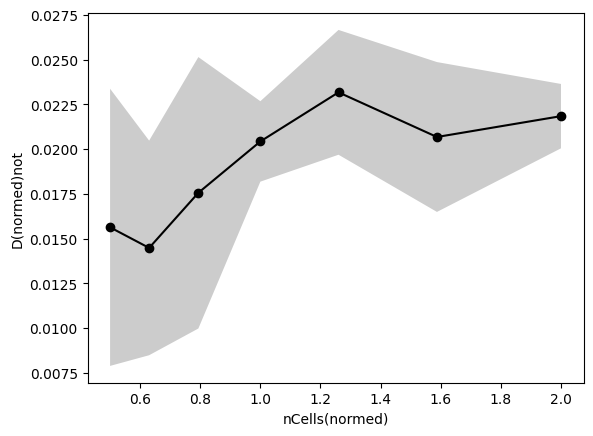

In [8]:

# get all entries with a given key name
key = "nCells"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs = ProcessGroup(df,key)
cases[key] = case

PlotKey(case.conds,case.Ds,case.Dstds,key,normalize=True)



In [ ]:
get mean position

SyntaxError: ignored

### Introduce ATP into the equation

 <a class="anchor" name="myCell"></a>



In [9]:
import pandas as pd
if False:
  dataFrameName = "nocrowder.csv"
  df = pd.read_csv(dataFrameName)
  dataFrameName = "nocrowder_atp.csv"
  dfATP = pd.read_csv(dataFrameName)
else:
  df = nocrowder_noatp
  dfATP=nocrowder_atp


In [10]:
dfATP

Unnamed: 0                           trajName       tag    condVal  \
7             7   nocrowder_atp_cellRad3.174802_03   cellRad   3.174802   
8             8   nocrowder_atp_cellRad5.039684_04   cellRad   5.039684   
9             9   nocrowder_atp_nCells10.000000_04    nCells  10.000000   
11           11   nocrowder_atp_cellRad2.000000_03   cellRad   2.000000   
13           13   nocrowder_atp_cellRad5.039684_01   cellRad   5.039684   
..          ...                                ...       ...        ...   
422         422  nocrowder_atp_cellAttr0.158740_02  cellAttr   0.158740   
424         424   nocrowder_atp_nCells40.000000_04    nCells  40.000000   
425         425  nocrowder_atp_cellAttr0.062996_03  cellAttr   0.062996   
427         427   nocrowder_atp_nCells25.198421_02    nCells  25.198421   
431         431    nocrowder_atp_xScale5.000000_01    xScale   5.000000   

            D  flux*A  Vol Frac  
7    0.016289 -0.0013   0.99999  
8    0.013623 -0.0012   0.99999  
9    0.008260 -0.0009   0.99999  
11   0.013582 -0.0008   0.99999  
13   0.012766 -0.0012   0.99999  
..        ...     ...       ...  
422  0.019100 -0.0013   0.99999  
424  0.026520 -0.0024   0.99999  
425  0.010245 -0.0015   0.99999  
427  0.014551 -0.0016   0.99999  
431  0.009963 -0.0015   0.99999  

[157 rows x 7 columns]

[ 2.5         3.14980262  3.96850263  5.          6.29960525  7.93700526
 10.        ]


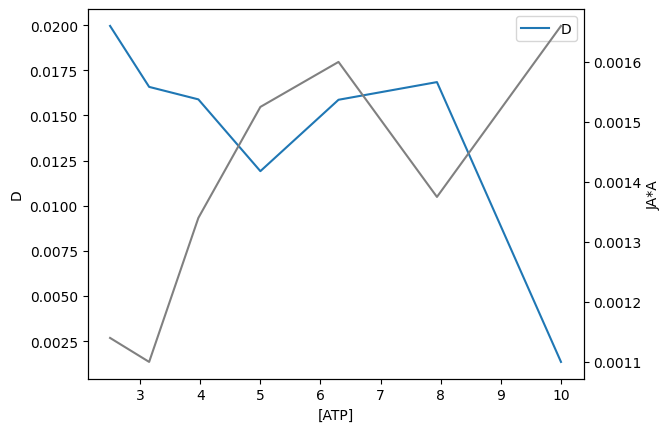

In [11]:
case = empty()
case.conds,case.Ds,case.Dstds, case.JAs,case.volFracs = ProcessGroup(dfATP,"xScale")
#dfATP.xScale

fig,axl = plt.subplots()
axl.plot(case.conds,case.Ds,label='D')
axl.set_ylabel("D")
axl.set_xlabel("[ATP]")
axl.legend(loc=0)

# we use negative -1 since negative flux is going across toward right
axr = axl.twinx()
axr.plot(case.conds,-1 * case.JAs,'gray')
axr.set_ylabel("JA*A")

plt.gcf().savefig(outPath+"fig4_D_vs_ATP.png",dpi=300)

[10.         12.5992105  15.87401052 20.         25.198421   31.74802104
 40.        ]
[10.         12.5992105  15.87401052 20.         25.198421   31.74802104
 40.        ]
Assuming middle value is reference
x(3) = 20.000000
Assuming middle value is reference
x(3) = 20.000000


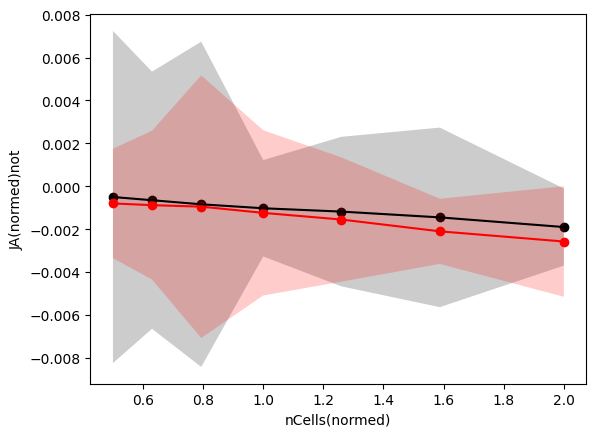

In [12]:
# plotting two sets of data
# get all entries with a given key name
key = "nCells"

case = empty()
case.conds,case.Ds,case.Dstds, case.JAs, case.vFs = ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs = ProcessGroup(dfATP,key)
cases[key+"+atp"] = case

print("WARNING: using incorrect stderr")
case = cases[key+"-atp"]
PlotKey(case.conds,case.JAs,case.Dstds,key,normalize=True,mode="JA")

case = cases[key+"+atp"]
PlotKey(case.conds,case.JAs,case.Dstds,key,color='r',normalize=True,mode="JA")

plt.gcf().savefig(outPath+"fig4_nCells.png",dpi=300)


[2.         2.5198421  3.1748021  4.         5.0396842  6.34960421
 8.        ]
[2.         2.5198421  3.1748021  4.         5.0396842  6.34960421
 8.        ]
Assuming middle value is reference
x(3) = 4.000000
Assuming middle value is reference
x(3) = 4.000000


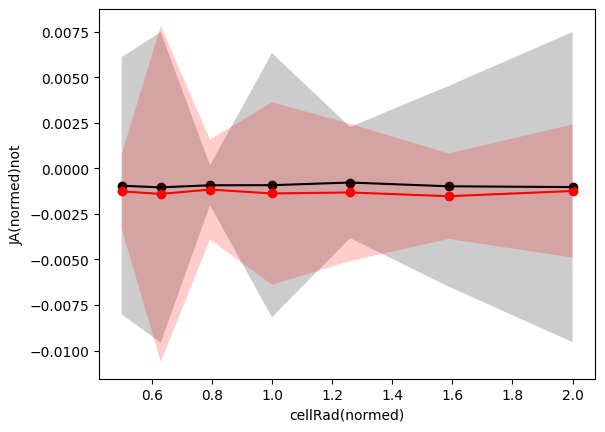

In [13]:

key = "cellRad"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = ProcessGroup(dfATP,key)
cases[key+"+atp"] = case


case = cases[key+"-atp"]
PlotKey(case.conds,case.JAs,case.Dstds,key,color='k',normalize=True,mode="JA")


case = cases[key+"+atp"]
PlotKey(case.conds,case.JAs,case.Dstds,key,color='r',normalize=True,mode="JA")


plt.gcf().savefig(outPath+"fig4_cellRad.png",dpi=300)

[0.05       0.06299605 0.07937005 0.1        0.1259921  0.15874011
 0.2       ]
[0.05       0.06299605 0.07937005 0.1        0.1259921  0.15874011
 0.2       ]
Assuming middle value is reference
x(3) = 0.100000
Assuming middle value is reference
x(3) = 0.100000


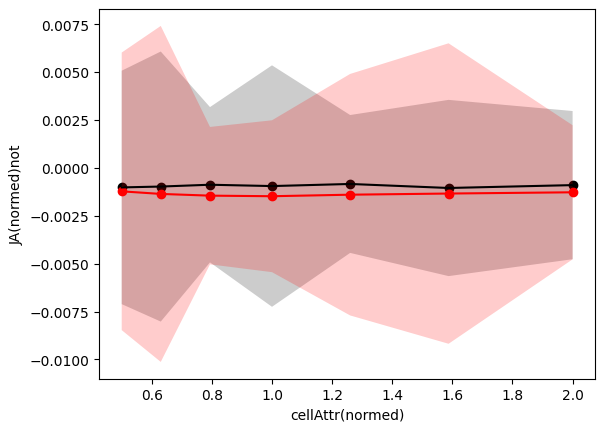

In [14]:
key = "cellAttr"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = ProcessGroup(dfATP,key)
cases[key+"+atp"] = case


case = cases[key+"-atp"]
PlotKey(case.conds,case.JAs,case.Dstds,key,color='k',normalize=True,mode="JA")


case = cases[key+"+atp"]
PlotKey(case.conds,case.JAs,case.Dstds,key,color='r',normalize=True,mode="JA")


plt.gcf().savefig(outPath+"fig4_cellAttr.png",dpi=300)

## CROWDERS WITH ATP

In [15]:
if False:
  dataFrameName = "crowder.csv"
  df = pd.read_csv(dataFrameName)
  dataFrameName = "crowder_atp.csv"
  dfATP = pd.read_csv(dataFrameName)
else:
  df = crowder_noatp
  dfATP = crowder_atp



[ 4.          5.0396842   6.34960421  8.         10.0793684  12.69920842
 16.        ]
[ 4.          5.0396842   6.34960421  8.         10.0793684  12.69920842
 16.        ]
Assuming middle value is reference
x(3) = 8.000000
Assuming middle value is reference
x(3) = 8.000000


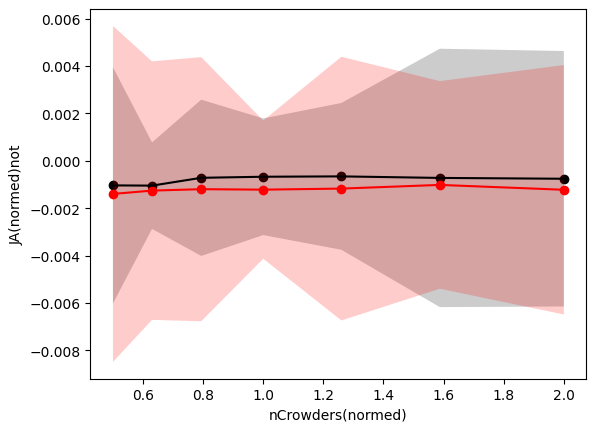

In [16]:
key = "nCrowders"

case = empty()
case.conds,case.Ds,case.Dstds, case.JAs, case.vFs  = ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds, case.JAs, case.vFs  = ProcessGroup(dfATP,key)
cases[key+"+atp"] = case


case = cases[key+"-atp"]
#PlotKey(case.conds,case.Ds,case.Dstds,key,normalize=False)
PlotKey(case.conds,case.JAs,case.Dstds,key,color='k',normalize=True,mode="JA")

case = cases[key+"+atp"]
#PlotKey(case.conds,case.Ds,case.Dstds,key,color='r',normalize=False)
PlotKey(case.conds,case.JAs,case.Dstds,key,color='r',normalize=True,mode="JA")


plt.gcf().savefig(outPath+"fig5_nCrowders.png",dpi=300)


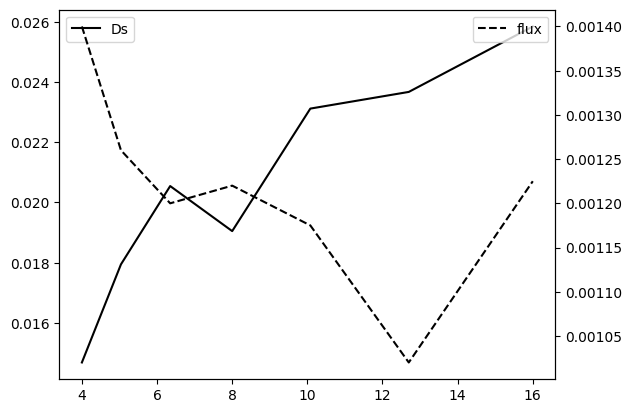

In [17]:
fig, axl = plt.subplots()
axl.plot(case.conds,case.Ds,'k-',label="Ds")
axl.legend(loc=2)
axr=axl.twinx()
axr.plot(case.conds,-1*case.JAs,'k--',label="flux")
axr.legend(loc=0)


[ 3.75        4.72470394  5.95275394  7.5         9.44940787 11.90550789]
[ 3.75        4.72470394  5.95275394  7.5         9.44940787 11.90550789]


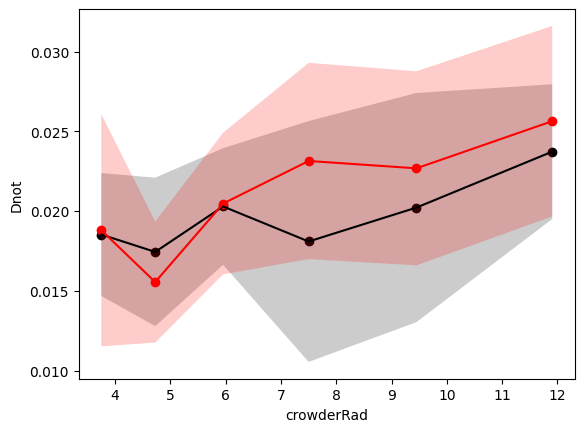

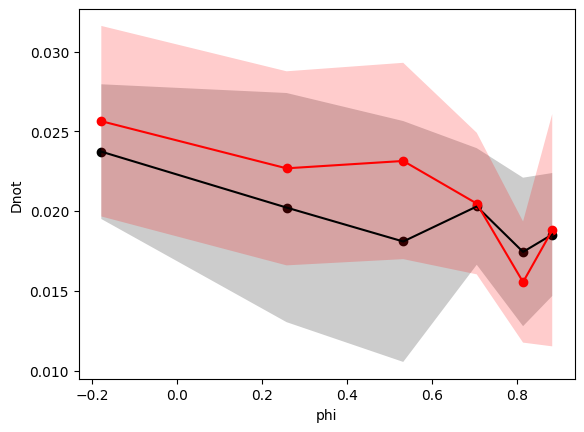

In [18]:
key = "crowderRad"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = ProcessGroup(dfATP,key)
cases[key+"+atp"] = case


case = cases[key+"-atp"]
PlotKey(case.conds,case.Ds,case.Dstds,key,normalize=False)

case = cases[key+"+atp"]
PlotKey(case.conds,case.Ds,case.Dstds,key,color='r',normalize=False)


plt.gcf().savefig(outPath+"fig5_crowderRad.png",dpi=300)


#### Also do vs vol frac
plt.figure()
case = cases[key+"-atp"]
PlotKey(case.vFs,case.Ds,case.Dstds,key,normalize=False, altName="phi")

case = cases[key+"+atp"]
PlotKey(case.vFs,case.Ds,case.Dstds,key,color='r',normalize=False,altName="phi")


[0.05       0.06299605 0.07937005 0.1        0.1259921  0.15874011
 0.2       ]
[0.05       0.06299605 0.07937005 0.1        0.1259921  0.15874011
 0.2       ]
Assuming middle value is reference
x(3) = 0.100000
Assuming middle value is reference
x(3) = 0.100000


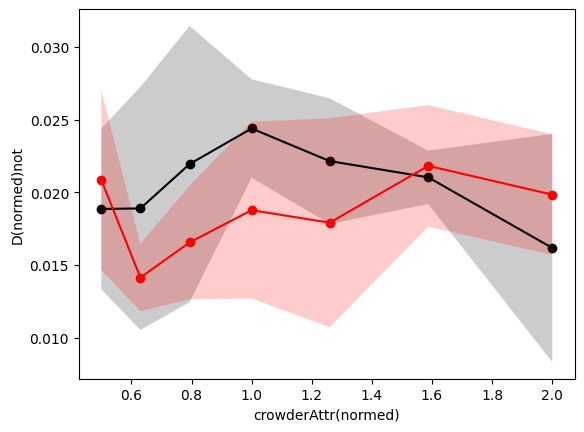

In [19]:
key = "crowderAttr"

case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = ProcessGroup(df,key)
cases[key+"-atp"] = case


case = empty()
case.conds,case.Ds,case.Dstds,case.JAs, case.vFs  = ProcessGroup(dfATP,key)
cases[key+"+atp"] = case


case = cases[key+"-atp"]
PlotKey(case.conds,case.Ds,case.Dstds,key,normalize=True)

case = cases[key+"+atp"]
PlotKey(case.conds,case.Ds,case.Dstds,key,color='r',normalize=True)

plt.gcf().savefig(outPath+"fig5_crowderAttr.png",dpi=300)

## Continuum data

- Run master on kant (test07-test10)
- See paper notes for more detail on repository
../solutions/test07/smol/0001/info.yaml:Deff_membrane: 0.49443361495120397
../solutions/test08/smol/0001/info.yaml:Deff_membrane: 0.7730293910002057
../solutions/test09/smol/0001/info.yaml:Deff_membrane: 0.7963113880422519
../solutions/test10/smol/0001/info.yaml:Deff_membrane: 0.9866307129197737
Singularity> grep phi_memb ../solutions/test*/smol/0001/info.yaml
../solutions/test07/smol/0001/info.yaml:phi_membrane: 0.6681145173651292
../solutions/test08/smol/0001/info.yaml:phi_membrane: 0.8539840575456275
../solutions/test09/smol/0001/info.yaml:phi_membrane: 0.8772177500681925
../solutions/test10/smol/0001/info.yaml:phi_membrane: 0.9933862126810031


In [ ]:
import matplotlib.pylab as plt
import numpy as np
phis = np.array([0.4108862126810036, 0.6681145173651292, 0.8539840575456275, 0.8772177500681925, 0.9933862126810031])
Ds = np.array([0.403642231410656, 0.49443361495120397, 0.7730293910002057, 0.7963113880422519, 0.9866307129197737])

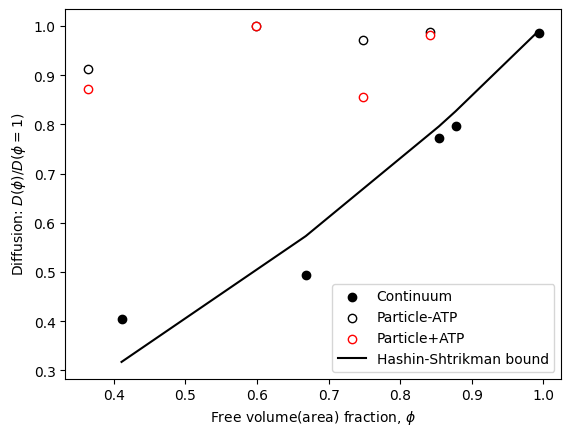

In [ ]:



plt.scatter(phis,Ds,facecolor='k',label="Continuum")

case = cases['crowderRad'+"-atp"]
plt.scatter(case.vFs,case.Ds/np.max(case.Ds),facecolor='w',edgecolor='k',
            label="Particle-ATP")
case = cases['crowderRad'+"+atp"]
plt.scatter(case.vFs,case.Ds/np.max(case.Ds),facecolor='w',edgecolor='r',
            label="Particle+ATP")


plt.plot(phis,2*phis/(3-phis),'k',label="Hashin-Shtrikman bound")
plt.legend(loc=0)
plt.xlabel("Free volume(area) fraction, $\phi$")
plt.ylabel("Diffusion: $D(\phi)/D(\phi=1)$")

plt.gcf().savefig(outPath+"fig7_DvsPhi.png",dpi=300)


Widths

Created test11-13
/info.yaml
totflux_A_pore: 0.05925859045541587
pkekeneshuskey@kant:requests/$ grep totflux_A_pore ../solutions/test12/smol/0001/info.yaml
totflux_A_pore: 0.07531812128985557
pkekeneshuskey@kant:requests/$ grep totflux_A_pore ../solutions/test13/smol/0001/info.yaml
totflux_A_pore: 0.0876739876632738


5, 7, and 9 pore widths; assuming it's 11 high



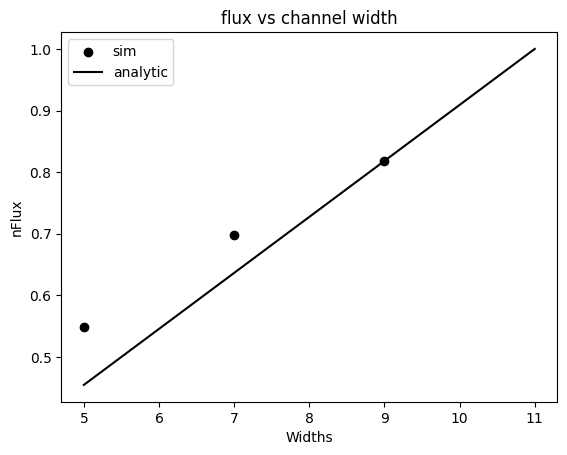

In [ ]:
widths=[5,7,9]
fluxes = np.array([0.059,0.075,0.088])
max=11 # include this in widths next time
print("WARNING: use actual value")
maxFlux = fluxes[2]*max/widths[2]

import matplotlib.pylab as plt
import numpy as np
plt.scatter(widths,fluxes/maxFlux, facecolor='k',label="sim")
validwidths = np.array([5,7,9,max])
plt.plot(validwidths,validwidths/max,'k',label='analytic')
plt.ylabel("nFlux")
plt.xlabel("Widths")
plt.title("flux vs channel width")
plt.legend(loc=0)


plt.gcf().savefig(outPath+"fig7_JvsW.png",dpi=300)


In [ ]:
maxFlux

1.0755555555555556